In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from PIL import Image 
import matplotlib.patches as mpatches

sns.set_style("whitegrid")

In [2]:
data_path = "/Users/bartosz/PycharmProjects/breast_cancer/data/raw_dataset/IDC_regular_ps50_idx5/"
files = os.listdir(data_path)

patient_id_list = []
patient_class_list = []
patient_class_image_path_list = []

for file in tqdm(files):
    patient_id = file
    patient_data_path = data_path + patient_id + "/"
    patient_classes = os.listdir(patient_data_path)
    for patient_class in patient_classes:
        patient_classes_path = patient_data_path + patient_class + "/"
        patient_class_images = os.listdir(patient_classes_path)
        for patient_class_image in patient_class_images:
            patient_class_image_path = patient_classes_path + patient_class_image
            
            patient_id_list.append(int(patient_id))
            patient_class_list.append(int(patient_class))
            patient_class_image_path_list.append(patient_class_image_path)

patients_df = pd.DataFrame(
    {'patient_id': patient_id_list,
     'class': patient_class_list,
     'image path': patient_class_image_path_list
    })

patients_df.head()

<ipython-input-2-13fdaa739bb0>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(files):


,patient_id,class,image path
0,9036,0,/Users/bartosz/PycharmProjects/breast_cancer/d...
1,9036,0,/Users/bartosz/PycharmProjects/breast_cancer/d...
2,9036,0,/Users/bartosz/PycharmProjects/breast_cancer/d...
3,9036,0,/Users/bartosz/PycharmProjects/breast_cancer/d...
4,9036,0,/Users/bartosz/PycharmProjects/breast_cancer/d...


In [3]:
positive_cases = np.random.choice(patients_df[patients_df['class'] == 1].index.values, size=36, replace=False)
negative_cases = np.random.choice(patients_df[patients_df['class'] == 0].index.values, size=36, replace=False)

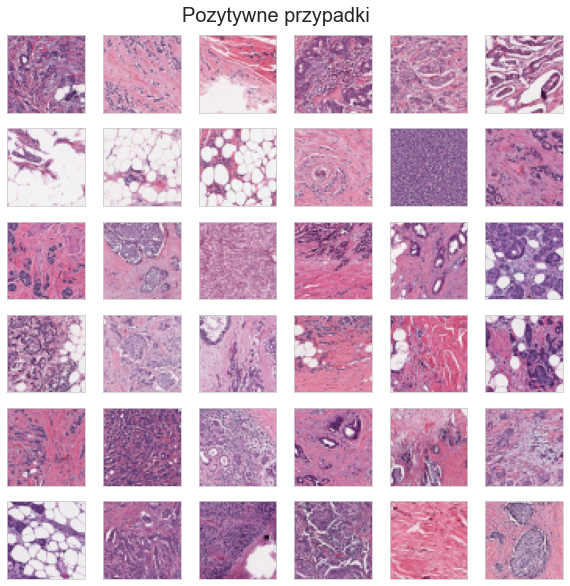

In [4]:
fig, ax = plt.subplots(6,6,figsize=(10, 10))
fig.suptitle('Pozytywne przypadki', y = 0.92, fontsize = 20)
for x in range(6):
    for y in range(6):
        xy = positive_cases[x + y * 6]
        image = plt.imread(patients_df.loc[xy, "image path"])
        ax[x,y].imshow(image)
        ax[x,y].grid(False)
        ax[x,y].set_xticks([])
        ax[x,y].set_yticks([])

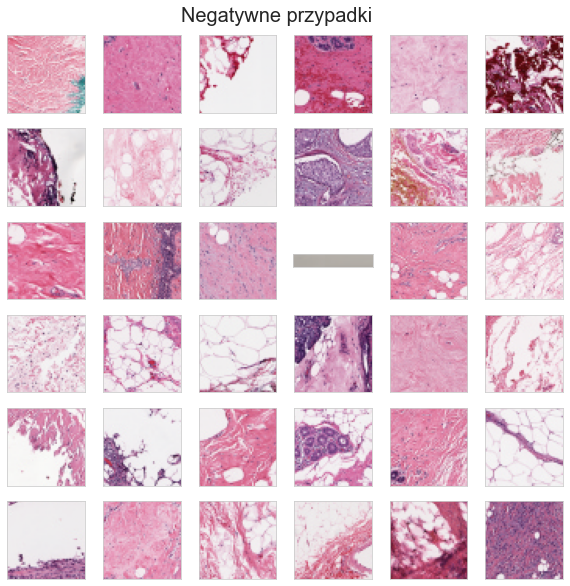

In [5]:
fig, ax = plt.subplots(6,6,figsize=(10, 10))
fig.suptitle('Negatywne przypadki', y = 0.92, fontsize = 20)
for x in range(6):
    for y in range(6):
        xy = negative_cases[x + y * 6]
        image = plt.imread(patients_df.loc[xy, "image path"])
        ax[x,y].imshow(image)
        ax[x,y].grid(False)
        ax[x,y].set_xticks([])
        ax[x,y].set_yticks([])

In [6]:
def extracting_coordinates(dataframe, patient_id):
    """extracting coordinates from image name"""
    dataframe = dataframe[dataframe['patient_id'] == patient_id]
    coordinates = dataframe['image path'].str.split("_", n=9, expand=True)
    coordinates = coordinates.drop([0, 1, 2, 3, 4, 5, 6, 9], axis = 1)
    coordinates = coordinates.rename(columns={7: 'x', 8: 'y'})
    coordinates['x'] = coordinates['x'].str.replace('x', '').astype(int)
    coordinates['y'] = coordinates['y'].str.replace('y', '').astype(int)
    dataframe_patient_dict = {'x': coordinates['x'],'y': coordinates['y'],'class': dataframe['class'],'image path': dataframe['image path']}
    dataframe_patient = pd.DataFrame(dataframe_patient_dict)
    dataframe_patient.reset_index(drop=True, inplace=True)
    return dataframe_patient

In [7]:
def patient_samples_visualisation(patient_id, fig_x, fig_y):
    patient_df = extracting_coordinates(patients_df, patient_id)
    ax[fig_x,fig_y].set_title('Pacjent numer ' + str(patient_id), fontsize = 15)
    sns.scatterplot(data = patient_df, x = 'x', y = 'y',s = 20, hue = 'class', palette = 'coolwarm', linewidth=0, ax = ax[fig_x,fig_y])
    ax[fig_x,fig_y].set_xlabel('Współrzędna X')
    ax[fig_x,fig_y].set_ylabel('Współrzędna Y')
    h, l = ax[fig_x,fig_y].get_legend_handles_labels()
    ax[fig_x,fig_y].legend(h, ['zdrowa', 'chora'], title='Rodzaj próbki:')

In [8]:
random_patients = np.random.choice(patients_df['patient_id'].unique(), size=9, replace=False)

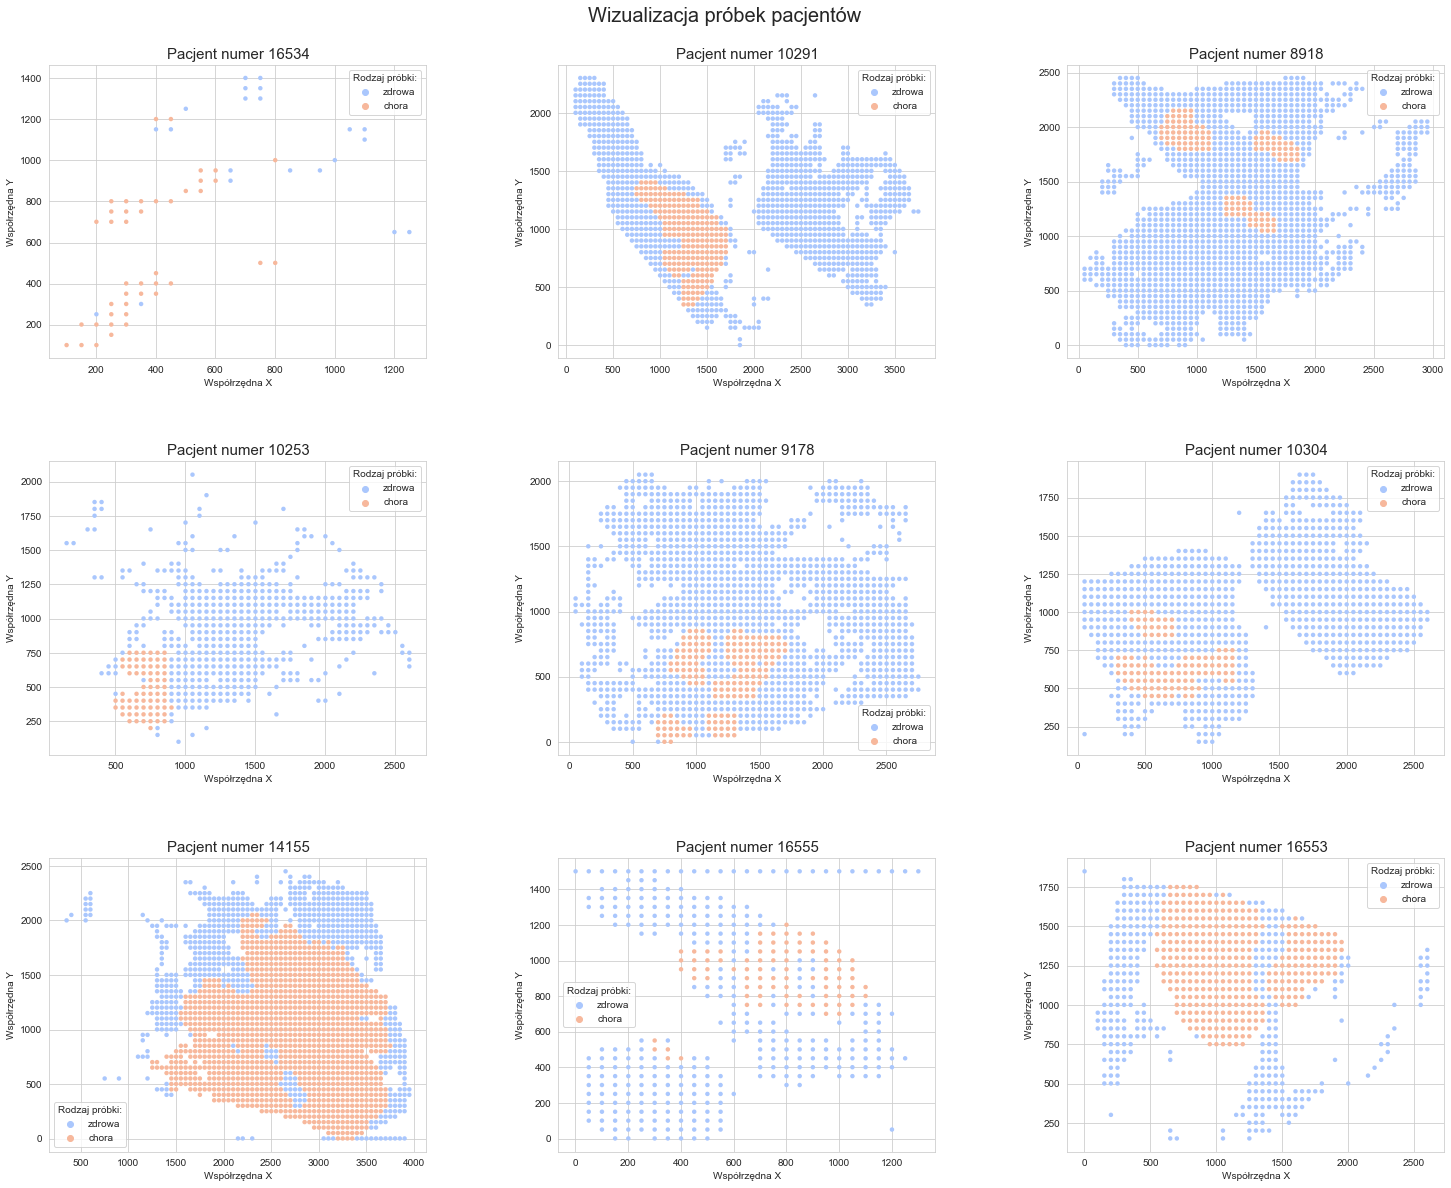

In [9]:
fig, ax = plt.subplots(3,3, figsize = (25,20))
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)
fig.suptitle('Wizualizacja próbek pacjentów', y = 0.92, fontsize = 20)
for x in range(3):
    for y in range(3):
        patient_id = random_patients[x + y * 3]
        patient_samples_visualisation(patient_id, x, y)

In [10]:
def patient_tissue_visualisation(patient_id):
    df = extracting_coordinates(patients_df, patient_id)
    grid = 255*np.ones(shape = (max(df['y']) + 50 - 1, max(df['x']) + 50 - 1, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max(df['y']) + 50 - 1, max(df['x']) + 50 - 1, 3)).astype(np.uint8)
    for n in range(len(df)):
        image = plt.imread(df.loc[n,'image path'])
        rgb_image = 255 * image
        x_start = df.loc[n,'x'] - 1
        y_start = df.loc[n,'y'] - 1
        x_end = x_start + image.shape[1]
        y_end = y_start + image.shape[0]
        grid[y_start:y_end,x_start:x_end] = rgb_image
        
        if (df.loc[n,'class'] == 1):
            mask[y_start:y_end,x_start:x_end] = (255, 0, 100)
            
    return grid, mask

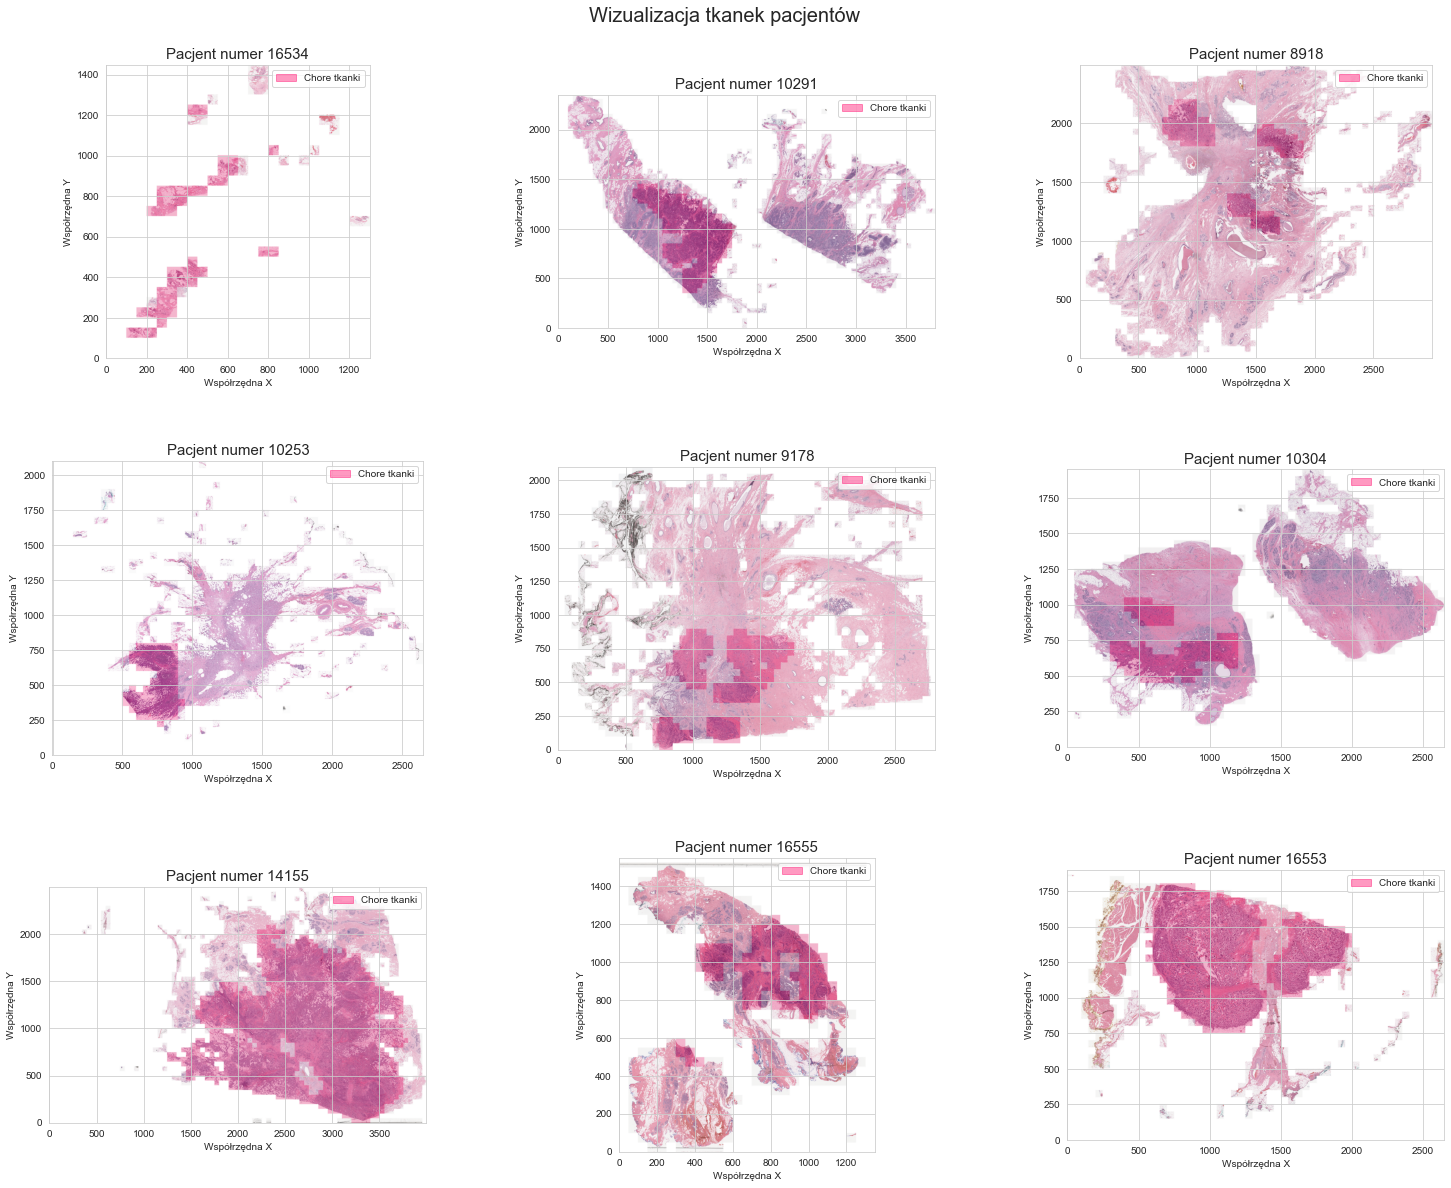

In [11]:
fig, ax = plt.subplots(3,3, figsize = (25,20))
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)
fig.suptitle('Wizualizacja tkanek pacjentów', y = 0.92, fontsize = 20)
cancer_patch = mpatches.Patch(color= (1, 0, 0.4, 0.4), label='Chore tkanki')
for x in range(3):
    for y in range(3):
        patient_id = random_patients[x + y * 3]
        tissue, ilness = patient_tissue_visualisation(patient_id)
        ax[x,y].set_title('Pacjent numer ' + str(patient_id), fontsize = 15)
        ax[x,y].imshow(tissue, origin='lower', alpha = 0.9)
        ax[x,y].imshow(ilness, origin='lower', alpha = 0.8)
        ax[x,y].imshow(tissue, origin='lower', alpha = 0.7)
        ax[x,y].set_xlabel('Współrzędna X')
        ax[x,y].set_ylabel('Współrzędna Y')
        ax[x,y].legend(handles=[cancer_patch])